# Sequential Models

This notebook talks about the simple code snippets for Simple RNN, GRU and LSTM implementation in Keras. These three models performance is compared on IMDB movie dataset

In [3]:
from keras.preprocessing.text import Tokenizer

In [4]:
samples = ["this is me and that is you", "here i am"]

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.fit_on_sequences(samples)
one_hot_result = tokenizer.texts_to_matrix(samples, mode="binary")

## IMDB

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [6]:
max_features = 10000
maxlen = 500
batch_size = 32

print("loading the data")
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), " training sequence")
print(len(X_test), " testing sequence")

print("Pad sequence ")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

loading the data
25000  training sequence
25000  testing sequence
Pad sequence 
X_train shape: (25000, 500)
X_test shape: (25000, 500)


## Simple RNN

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [19]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=5, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 10s 501us/step - loss: 0.6824 - acc: 0.5591 - val_loss: 0.6405 - val_acc: 0.6914

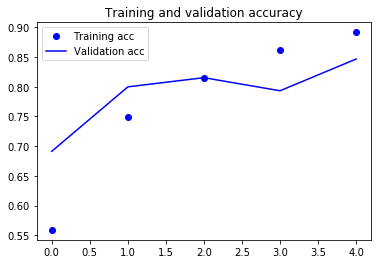

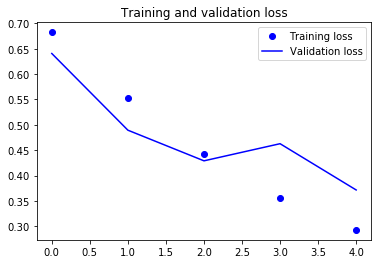

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### LSTM

In [13]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=5, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 48s 2ms/step - loss: 0.6391 - acc: 0.6660 - val_loss: 0.8153 - val_acc: 0.5432

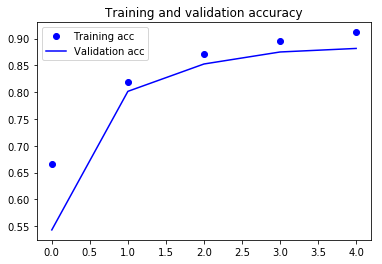

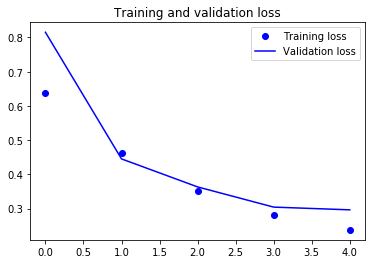

In [16]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### GRU

In [17]:

from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=5, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 42s 2ms/step - loss: 0.6715 - acc: 0.6428 - val_loss: 0.5062 - val_acc: 0.7632

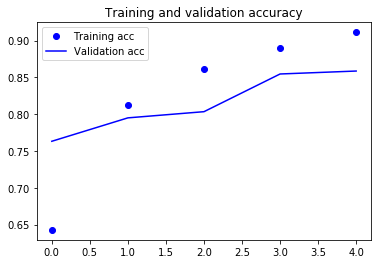

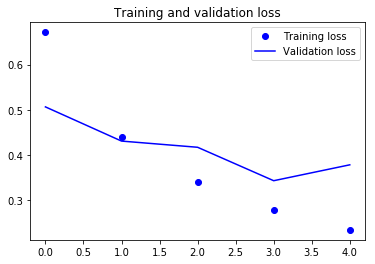

In [18]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()